In [1]:
#import packages
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [2]:
#import data
df = pd.read_csv('medical_clean.csv')

In [3]:
#view layout of data
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
#Drop Unwanted columns
df = df.drop(['Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng', 
             "Area",'TimeZone','Job','Marital'], axis=1)
df.head()

,CaseOrder,Population,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,2951,1,53,86575.93,Male,No,19.141466,6,0,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,11303,3,51,46805.99,Female,No,18.940352,4,2,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,17125,3,53,14370.14,Female,No,18.057507,4,1,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,2162,0,78,39741.49,Male,No,16.576858,4,1,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,5287,1,22,1209.56,Female,No,17.439069,5,0,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#convert categorical variables to numerical
df = pd.get_dummies(df)
df.head()

,CaseOrder,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,...,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,1,2951,1,53,86575.93,19.141466,6,0,0,10.585770,...,0,1,1,0,0,1,1,0,0,0
1,2,11303,3,51,46805.99,18.940352,4,2,1,15.129562,...,1,0,0,1,1,0,0,0,1,0
2,3,17125,3,53,14370.14,18.057507,4,1,0,4.772177,...,1,0,1,0,1,0,1,0,0,0
3,4,2162,0,78,39741.49,16.576858,4,1,0,1.714879,...,1,0,0,1,0,1,1,0,0,0
4,5,5287,1,22,1209.56,17.439069,5,0,2,1.254807,...,0,1,1,0,1,0,0,1,0,0


<AxesSubplot:>

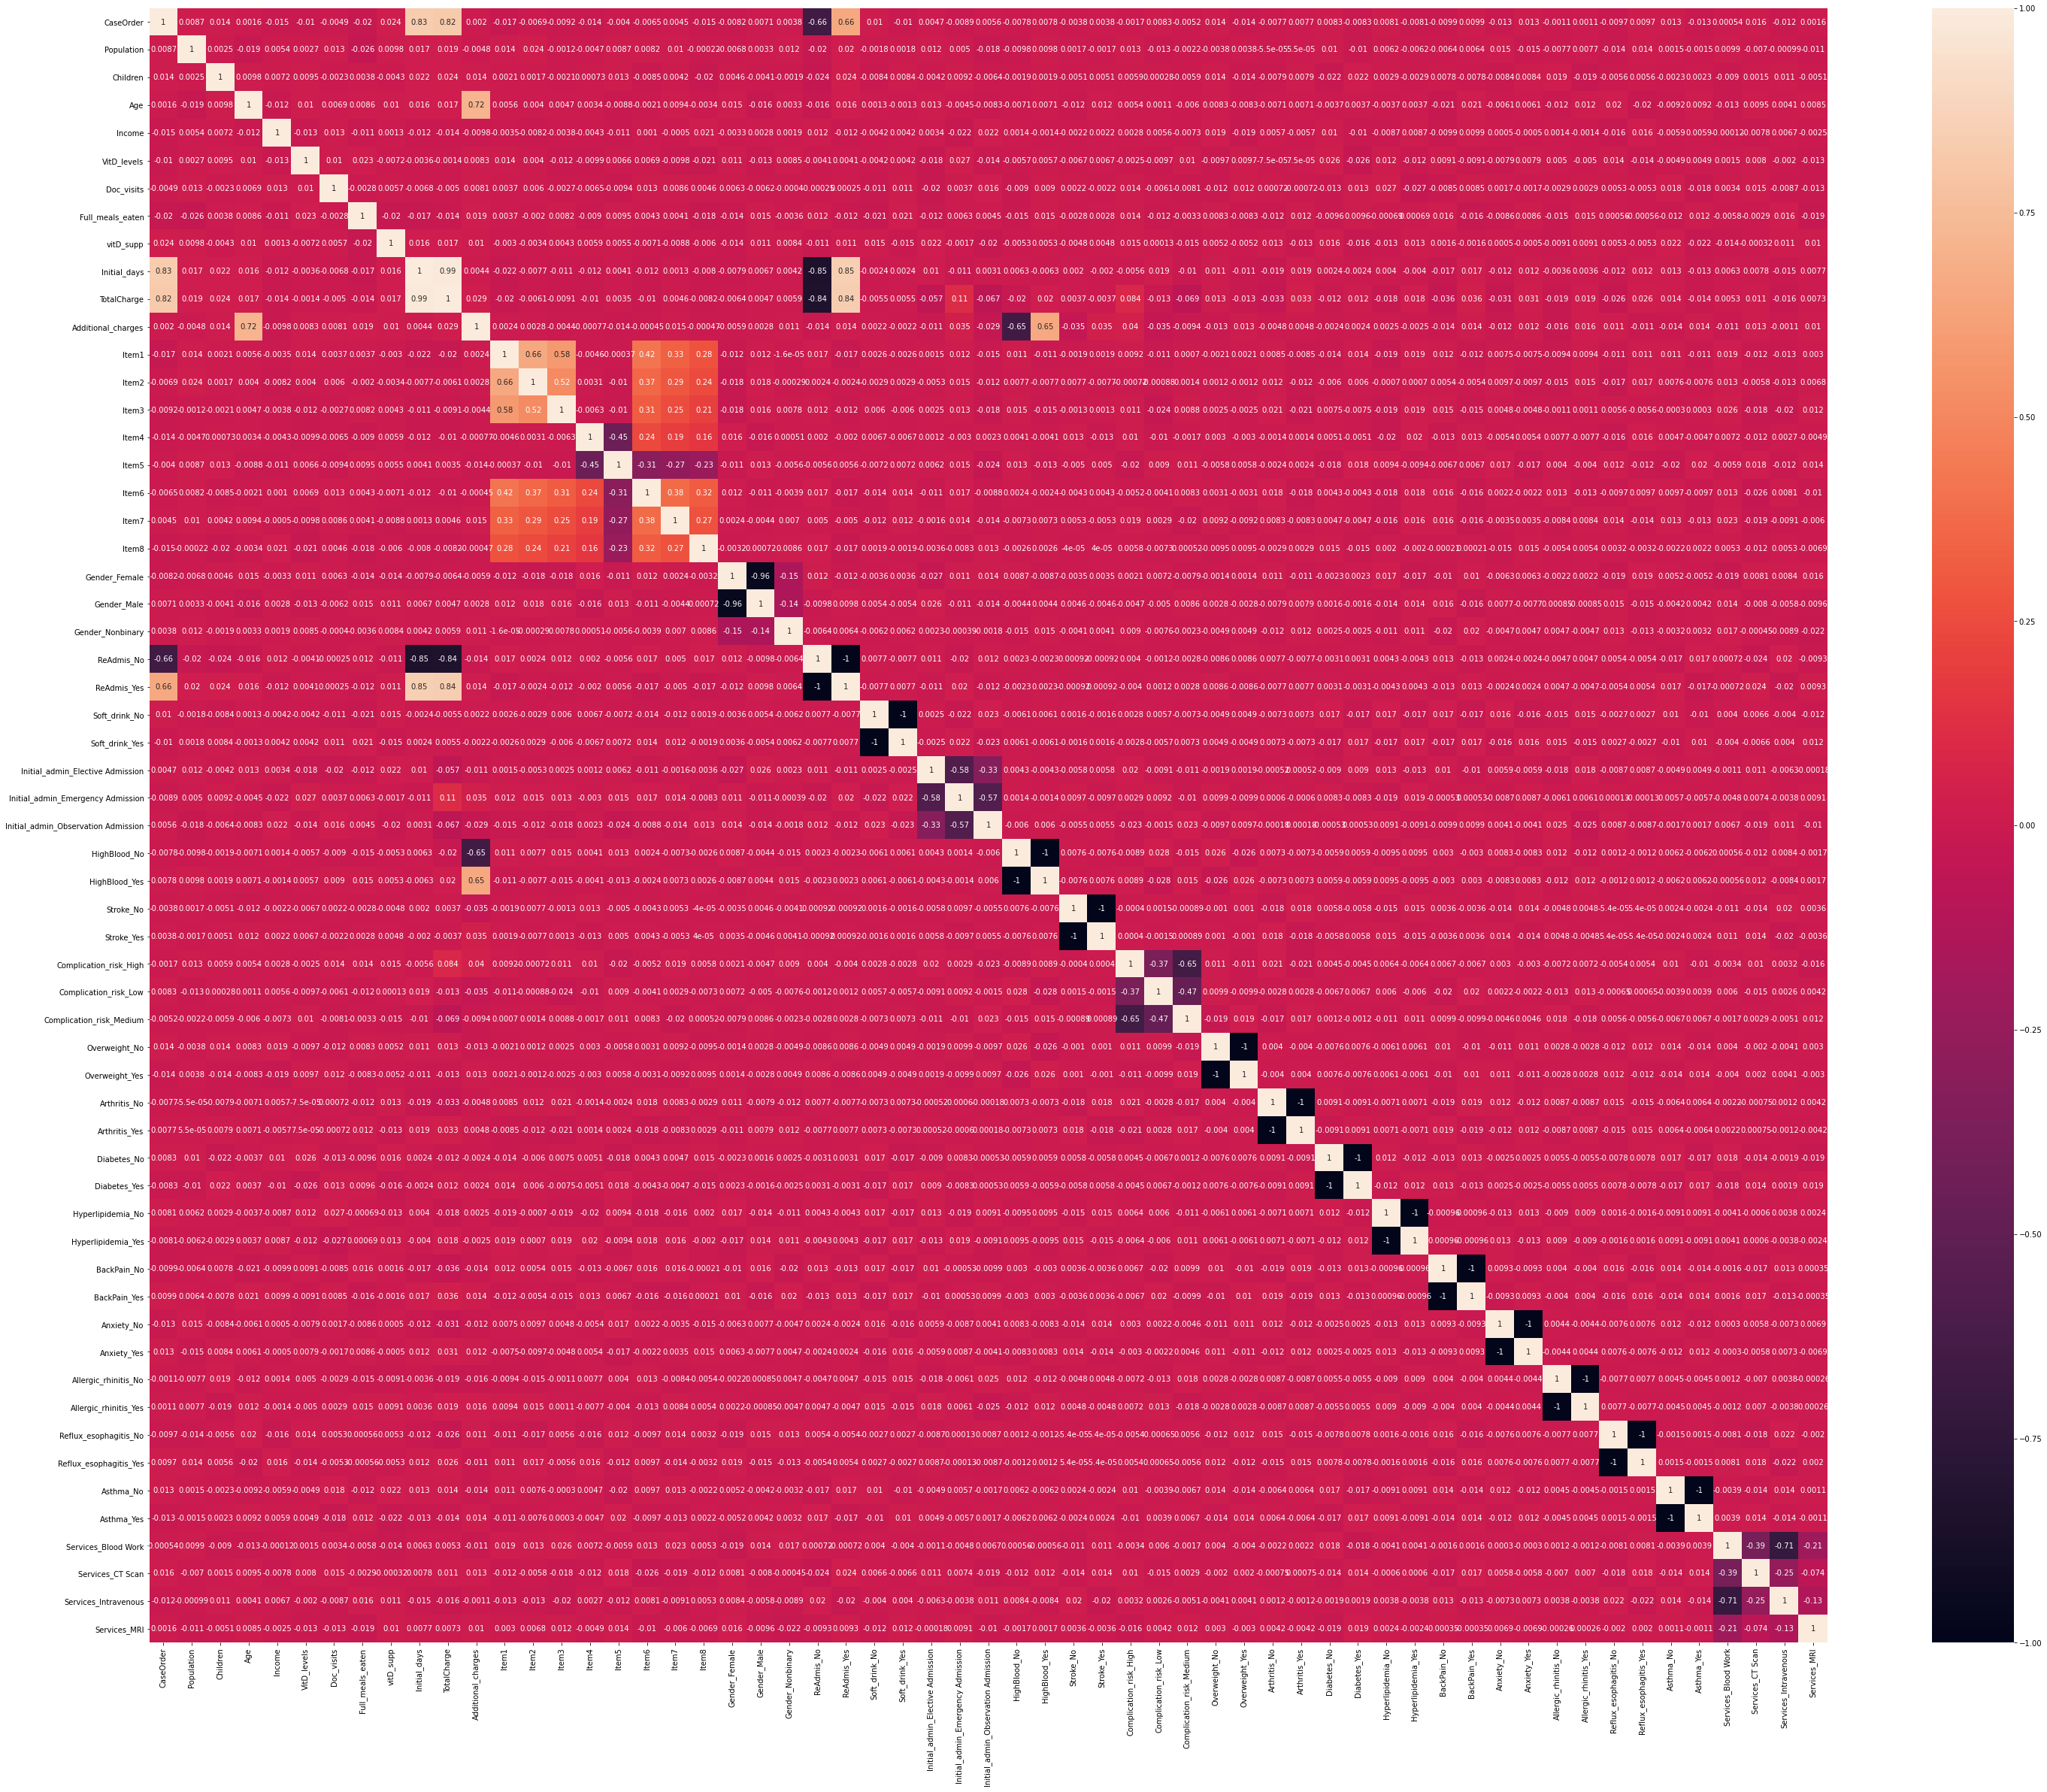

In [6]:
#Heatmap to check correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (50,40))
sns.heatmap(df.corr(),annot = True)

array([[<AxesSubplot:title={'center':'CaseOrder'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>,
        <AxesSubplot:title={'center':'Doc_visits'}>,
        <AxesSubplot:title={'center':'Full_meals_eaten'}>],
       [<AxesSubplot:title={'center':'vitD_supp'}>,
        <AxesSubplot:title={'center':'Initial_days'}>,
        <AxesSubplot:title={'center':'TotalCharge'}>,
        <AxesSubplot:title={'center':'Additional_charges'}>,
        <AxesSubplot:title={'center':'Item1'}>,
        <AxesSubplot:title={'center':'Item2'}>,
        <AxesSubplot:title={'center':'Item3'}>,
        <AxesSubplot:title={'center':'Item4'}>],
       [<AxesSubplot:title={'center':'Item5'}>,
        <AxesSubplot:title={'center':'Item6'}>,
        <AxesSubplot:title={'center':'Item7'}>,
        <AxesSubplot:ti

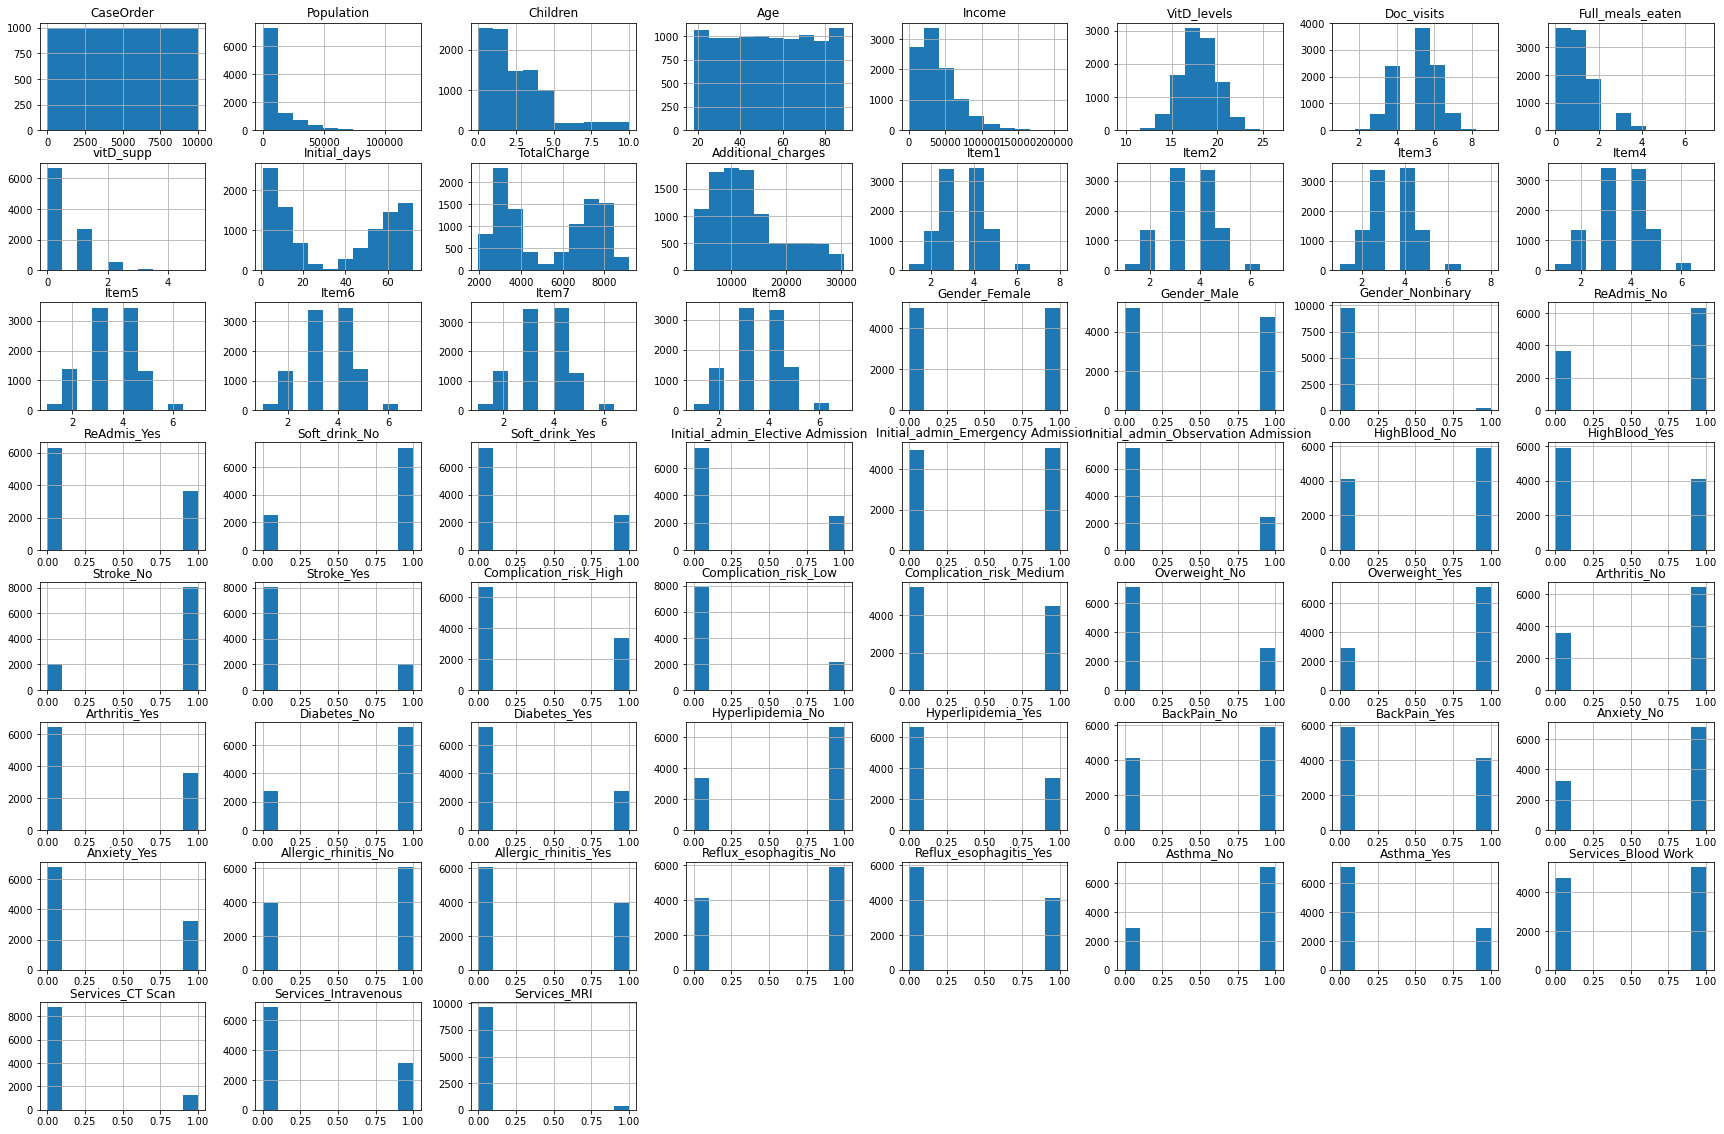

In [7]:
#Histograms of all numerical variables
df.hist(figsize=(30,20))

True


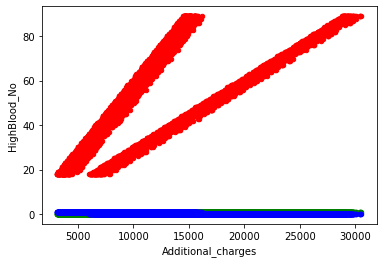

In [8]:
#Bivariate Visualization
ax1 = df.plot(kind='scatter', x='Additional_charges', y='Age', color='r')    
ax2 = df.plot(kind='scatter', x='Additional_charges', y='HighBlood_Yes', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Additional_charges', y='HighBlood_No', color='b', ax=ax1)
print(ax1 == ax2 == ax3)  # True

In [9]:
#export file to csv
df.to_csv('medical_data_prep.csv', index = False)

In [10]:
#Prepare variables
observations = len(df)
variables = df.columns[:-1]
X = df.iloc[:, 1:59]
y = df['Additional_charges']

In [11]:
#Import required packages
import statsmodels.api as sm

In [12]:
#Perform analysis
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Additional_charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.125e+20
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:18:08   Log-Likelihood:             1.0644e+05
No. Observations:               10000   AIC:                        -2.128e+05
Df Residuals:                    9958   BIC:                        -2.125e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -1.341e-07      0.063  -2.14e-06      1.000      -0.123       0.123
Population                          -5.551e-17   3.91e-12  -1.42e-05      1.000   -7.66e-12    7.66e-12
Children                            -2.984e-12   2.68e-08     -0.000      1.000   -5.25e-08    5.25e-08
Age                                  1.434e-13   8.53e-09   1.68e-05      1.000   -1.67e-08    1.67e-08
Income                               1.843e-16   2.03e-12   9.08e-05      1.000   -3.98e-12    3.98e-12
VitD_levels                         -1.599e-13   2.87e-08  -5.56e-06      1.000   -5.63e-08    5.63e-08
Doc_visits                           1.478e-12   5.54e-08   2.67e-05      1.000   -1.09e-07    1.09e-07
Full_meals_eaten                    -7.674e-13   5.75e-08  -1.33e-05      1.000   -1.13e-07    1.13e-07
vitD_supp                           -6.253e-13   9.22e-08  -6.79e-06      1.000   -1.81e-07    1.81e-07
Initial_days                         1.118e-08      0.018   6.17e-07      1.000      -0.035       0.035
TotalCharge                          1.106e-09      0.000      5e-06      1.000      -0.000       0.000
Additional_charges                      1.0000   3.57e-11    2.8e+10      0.000       1.000       1.000
Item1                                1.563e-13   8.34e-08   1.88e-06      1.000   -1.63e-07    1.63e-07
Item2                               -3.197e-13   7.69e-08  -4.16e-06      1.000   -1.51e-07    1.51e-07
Item3                               -2.771e-13    7.1e-08   -3.9e-06      1.000   -1.39e-07    1.39e-07
Item4                                4.476e-13   6.32e-08   7.08e-06      1.000   -1.24e-07    1.24e-07
Item5                                 7.39e-13   6.66e-08   1.11e-05      1.000   -1.31e-07    1.31e-07
Item6                               -3.197e-13   6.88e-08  -4.65e-06      1.000   -1.35e-07    1.35e-07
Item7                                9.948e-14   6.48e-08   1.54e-06      1.000   -1.27e-07    1.27e-07
Item8                               -1.137e-13    6.1e-08  -1.86e-06      1.000    -1.2e-07     1.2e-07
Gender_Female                        -1.49e-08      0.021  -7.12e-07      1.000      -0.041       0.041
Gender_Male                          -1.49e-08      0.021  -7.12e-07      1.000      -0.041       0.041
Gender_Nonbinary                     -2.98e-08      0.021  -1.42e-06      1.000      -0.041       0.041
ReAdmis_No                          -2.235e-08      0.031  -7.12e-07      1.000      -0.062       0.062
ReAdmis_Yes                          -1.49e-08      0.031  -4.74e-07      1.000      -0.062       0.062
Soft_drink_No                       -1.043e-07      0.031  -3.32e-06      1.000      -0.062       0.062
Soft_drink_Yes                      -8.196e-08      0.031  -2.61e-0

In [13]:
#Perform MLR with only selected Variables
observations = len(df)
variables = df.columns[:-1]
X = df[['Age','HighBlood_Yes','HighBlood_No']]
y = df['Additional_charges']

In [14]:
#Perform analysis
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Additional_charges   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 7.232e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:18:32   Log-Likelihood:                -88356.
No. Observations:               10000   AIC:                         1.767e+05
Df Residuals:                    9997   BIC:                         1.767e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1092.6109     30.906     35.353      0.000    1032.029    1153.193
Age             225.7781      0.806    280.063      0.000     224.198     227.358
HighBlood_Yes  4865.8621     23.734    205.018      0.000    4819.339    4912.385
HighBlood_No  -3773.2511     22.065   -171.006      0.000   -3816.503   -3729.999
==============================================================================
Omnibus:                     1002.006   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.201
Skew:                          -0.016   Prob(JB):                     5.84e-64
Kurtosis:                       2.165   Cond. No.                     2.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
#Packages to check residuals
import matplotlib as mpl
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split

from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

mpl.rcParams['figure.figsize'] = (9,6)

In [16]:
#Create Test and Training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

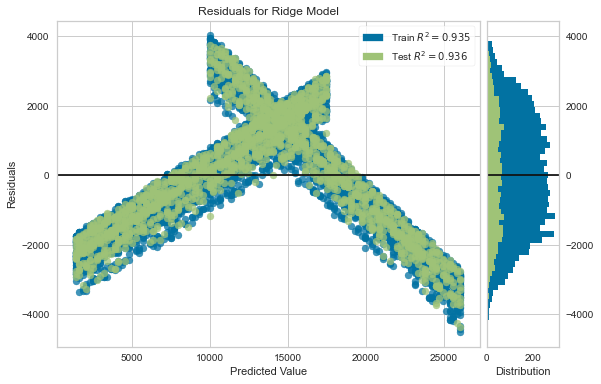

In [17]:
#Plot Residuals
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)   
g = visualizer.poof()          

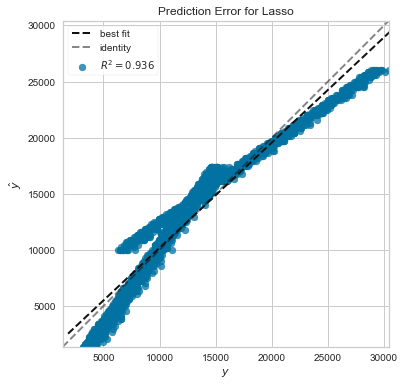

In [18]:
# Instantiate the linear model
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

In [19]:
#Perform MLR with only selected Variables
observations = len(df)
variables = df.columns[:-1]
X = df[['CaseOrder','Additional_charges','ReAdmis_No']]
y = df['TotalCharge']

In [20]:
#Perform analysis
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:19:50   Log-Likelihood:                -82010.
No. Observations:               10000   AIC:                         1.640e+05
Df Residuals:                    9996   BIC:                         1.641e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4979.5314     38.245    130.200      0.000    4904.563    5054.500
CaseOrder              0.3542      0.004     87.104      0.000       0.346       0.362
Additional_charges     0.0070      0.001      5.204      0.000       0.004       0.010
ReAdmis_No         -2415.7155     24.360    -99.169      0.000   -2463.465   -2367.966
==============================================================================
Omnibus:                      130.638   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.735
Skew:                           0.245   Prob(JB):                     4.98e-28
Kurtosis:                       2.752   Cond. No.                     7.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#Create Test and Training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

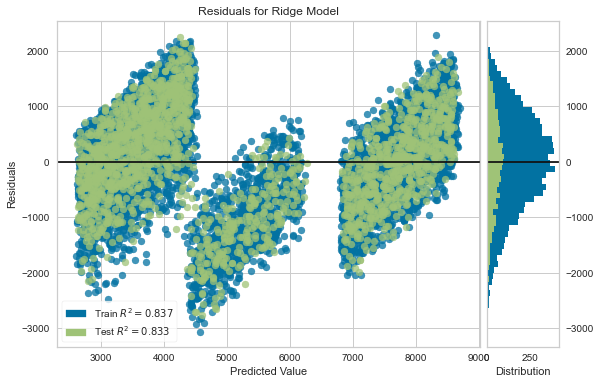

In [22]:
#Plot Residuals
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)   
g = visualizer.poof()  

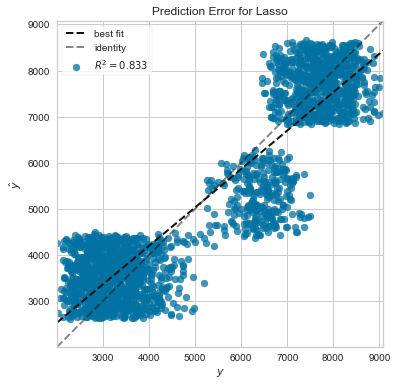

In [23]:
# Instantiate the linear model
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()